![Astrofisica Computacional](../logo.PNG)

---
## 02. ODEs I. Euler's method to describe the Motion of a Comet


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

This notebook presents the application of Euler's method to the problem of the movement of a comet around the Sun.

---

## A Comet-Sun System

In this application problem the motion of a comet around the Sun is described. The mass of the comet will be considered to be much smaller than the mass of the Sun, $m \ll M$, which is in agreement with reality. For example, the mass of Halley's Comet is $m \approx 2.2 \times 10^{14}$ kg, which is a very small amount compared to the mass of the Sun, $M \approx 1.9 \times 10^{30} $ kg.

This assumption implies that the comet will move while the Sun remains stationary at the origin of coordinates. In this way, the equations of motion will be,

\begin{align}
\frac{d^2 x}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{d^2 y}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y ,
\end{align}

where the problem has been restricted to the plane of motion, with coordinates $xy$. To solve this problem numerically, we rewrite the system of equations in the form

\begin{align}
\frac{d x}{dt} = &v^x \\
\frac{d y}{dt} = &v^y \\
\frac{dv^x}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{dv^y}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y.
\end{align}


An important consideration has to do with the magnitudes of the physical quantities and constants involved in the problem. For the development, we will use the following system of units:

- Units of mass: Solar Masses $M_{\odot}$
- Distance units: astronomical units [au]
- Time units: years [yr]

In this system of units, the Newtonian gravitational constant takes the value $G = 4\pi^2$.

The system of ordinary differential equations is implemented by

In [1]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    '''
    x = q0[0]
    y = q0[1]
    vx = q0[2]
    vy = q0[3]
    f = np.zeros(4)
    f[0] = vx
    f[1] = vy
    f[2] = - G*M*x/(x**2 + y**2)**(3/2)
    f[3] = - G*M*y/(x**2 + y**2)**(3/2)
    return f


---
## Initial Condition

Choosing the initial condition can be a crucial aspect in the case of the two-body gravitational problem. One way to adequately establish this condition is by using the conserved quantities, which in this case will be the energy, $E$, and the total angular momentum, $l$,

\begin{equation}
E = \frac{1}{2} m \left[ (v^x)^2 + (v^y)^2\right] - \frac{GMm}{r}
\end{equation}

\begin{equation}
\vec{l} = \vec{r} \times \vec{p} = m \vec{r} \times \vec{v}.
\end{equation}

Considering that the movement occurs in the $x-y$ plane, we have

\begin{equation}
l = x p^y - y p^x = m(x v^y - y v^x).
\end{equation}

## Effective Potential

Another important quantity to take into account is the effective potential, defined in the form

\begin{equation}
V_{\text{eff}} (r) = \frac{l^2}{2m^2r^2} - \frac{GM}{r}.
\end{equation}

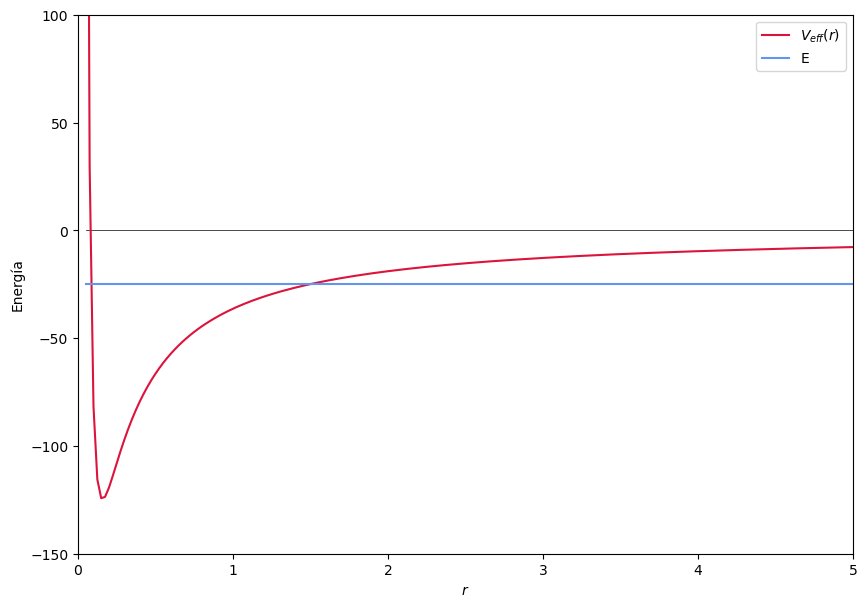

In [2]:
import matplotlib.pyplot as plt

def eff_potential(r, h, M=1.):
  return (h**2)/(2*r**2) - G/r

r = np.linspace(0.05,5.,200) 
plt.figure(figsize=(10,7))
plt.plot(r,np.zeros(len(r)),'k',linewidth=0.5)
plt.plot(r, eff_potential(r,h=2.5), color='crimson', label= r'$V_{eff}(r)$')
plt.plot(r,-25*np.ones(len(r)),color='cornflowerblue',linewidth=1.5, label='E')

plt.xlabel(r'$r$')
plt.ylabel(r'Energía')
plt.ylim(-150,100)
plt.xlim(0,5)
plt.legend()
plt.show()

### Conditions for Bounded Motion (Elliptical or Circular Paths)

From the relationships presented it is possible to impose some relationships to obtain the initial condition for a specific kind of motion. First, we must remember that the bounded trajectories, for a fixed value of angular momentum, $l$, must have a negative energy, i.e. $E< 0$. This imposes the restriction

\begin{equation}
\frac{E}{m} = \frac{1}{2} \left[(v^x)^2 + (v^y)^2\right] - \frac{GM}{r} < 0
\end{equation}
\begin{equation}
\left[(v^x)^2 + (v^y)^2\right]< \frac{2GM}{r}.
\end{equation}

Second, the total energy must be greater than (or equal to) the effective potential for motion to exist. This implies that

\begin{align}
\frac{E}{m} \geq &V_{\text{eff}} (r) \\
\frac{1}{2} \left[(v^x)^2 + (v^y)^2\right] - \frac{GM}{r} \geq &\frac{l^2}{2m ^2 r^2} - \frac{GM}{r}\\
\left[(v^x)^2 + (v^y)^2\right] \geq &\frac{(x v^y - y v^x)^2}{ r^2}
\end{align}

### Choosing the Initial Condition

Using $G= 4 \pi^2$ and $M = 1 M_{\odot}$, the conditions imposed above will be

\begin{equation}
    \begin{cases}
    \left[(v^x)^2 + (v^y)^2\right]< &\frac{8\pi^2}{r} \\
    \left[(v^x)^2 + (v^y)^2\right] \geq &\frac{(x v^y - y v^x)^2}{ r^2}
    \end{cases}
\end{equation}


Now we can choose that, at $t=0$, the coordinates of the comet are $x = 1 \text{ au}$ and $y=0 \text{ au}$. With this you get

\begin{equation}
    \begin{cases}
    (v^x)^2 + (v^y)^2&< 8\pi^2 \\
    (v^x)^2 &\geq 0.
    \end{cases}
\end{equation}

The equals sign in the second equation corresponds to the circular orbit (if located at the effective potential minimum) or the location of the return points (apses). Therefore, assuming that the initial condition will correspond to one of the apsis, $v^x = 0$ is taken and we will have only one equation that links the other velocity component,

\begin{equation}
    v^y < 2\sqrt{2}\pi \approx 8.885766 \frac{\text{au}}{\text{yr}}.
\end{equation}

Summarizing these results, to obtain a bounded orbit for the comet's motion, the initial condition will be imposed

\begin{equation}
    \begin{cases}
    x_0 = & 1\text{au}\\
    y_0 = & 0 \\
    v^x = & 0 \\
    v^y = & 3\frac{\text{au}}{\text{yr}}.
    \end{cases}
\end{equation}

The temporal grid that will be used to apply the integration method will be defined from $t_0 = 0$ to $t_f = 20$ years.

## ODE System Solution

Euler's method will now be used to solve the differential problem.

In [3]:
def FEuler(f, dx, t0, q0):
    '''
    ------------------------------------------
    FEuler(f, dx, t0, h0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    ------------------------------------------
    Arguments:
    f : Function with the RHS of the ODEs
    dx : stepsize for the iteration
    t0: initial time
    q0: NumPy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    q1 = q0 + dx*f(t0, q0)
    return q1



# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
dt = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
QE = np.zeros([n,4]) # Euler's Method information

# Initial Conditions
QE[0,0] = 1.
QE[0,1] = 0.
QE[0,2] = 0.
QE[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,n):
    q0 = QE[i-1]
    QE[i] = FEuler(f, dt, 0, q0)

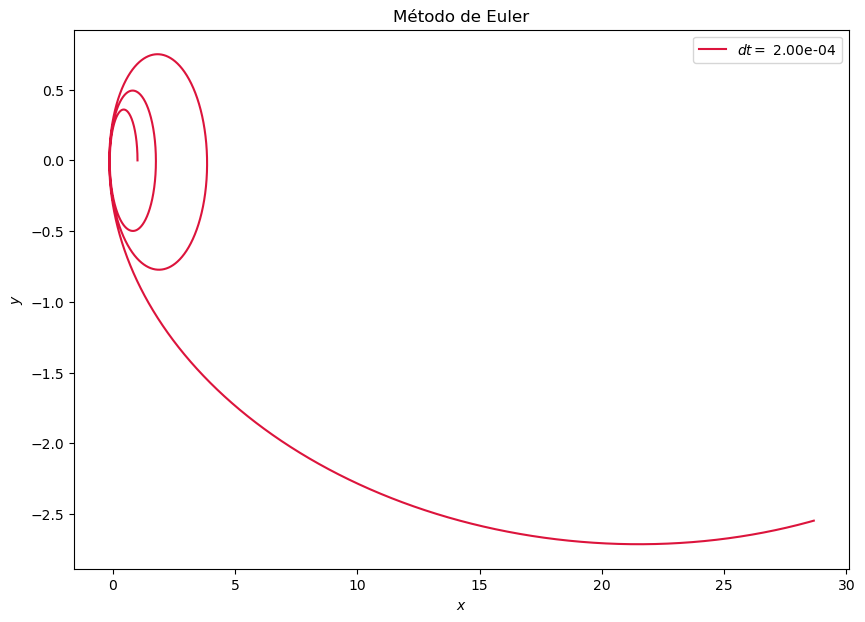

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(QE[:,0], QE[:,1], color='crimson', label=f'$dt =$ {dt:.2e}')
ax.set_title('Método de Euler')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

From the trajectory obtained it is clear that the method is not giving a good result for the initial parameters established. To improve the behavior, we will reduce the value of the size of the integration step,

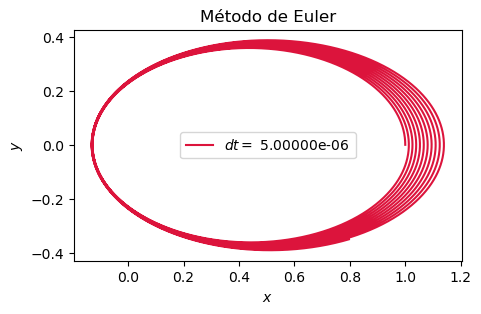

In [6]:
# Creation of the time grid (in years)
t_0 = 0.
t_f = 5.

# Number of steps in the grid (1 millon points!)
nI = 1000000

# Constant stepsize defined by the number of steps in the grid
dtI = (t_f - t_0)/nI

# Arrays to store the solution
tI = np.linspace(t_0, t_f, nI) # Time information
QEI = np.zeros([nI,4]) # Euler's Method information

# Initial Conditions
QEI[0,0] = 1.
QEI[0,1] = 0.
QEI[0,2] = 0.
QEI[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,nI):
    q0 = QEI[i-1]
    QEI[i] = FEuler(f, dtI, 0, q0)

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(QEI[:,0], QEI[:,1], color='crimson', label=f'$dt = $ {dtI:.5e}')
ax.set_title('Método de Euler')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

Even when the performance is not the best, an improvement is noted compared to the previous result. Further decreasing the step size improves the computed orbit.

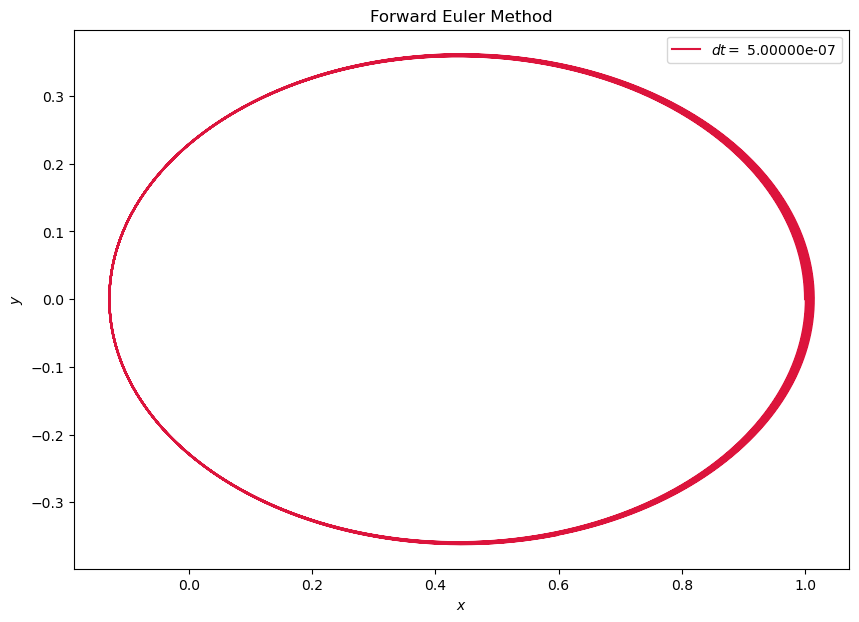

In [7]:
# Creation of the time grid (in years)
t_0 = 0.
t_f = 5.

# Number of steps in the grid (10 millon points!)
nII = 10000000

# Constant stepsize defined by the number of steps in the grid
dtII = (t_f - t_0)/nII

# Arrays to store the solution
tII = np.linspace(t_0, t_f, nII) # Time information
QEII = np.zeros([nII,4]) # Euler's Method information

# Initial Conditions
QEII[0,0] = 1.
QEII[0,1] = 0.
QEII[0,2] = 0.
QEII[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,nII):
    q0 = QEII[i-1]
    QEII[i] = FEuler(f, dtII, 0, q0)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(QEII[:,0], QEII[:,1], color='crimson', label=f'$dt = $ {dtII:.5e}')
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

---

To better analyze the result, we can calculate the energy and angular momentum of the system for the integrated time interval,

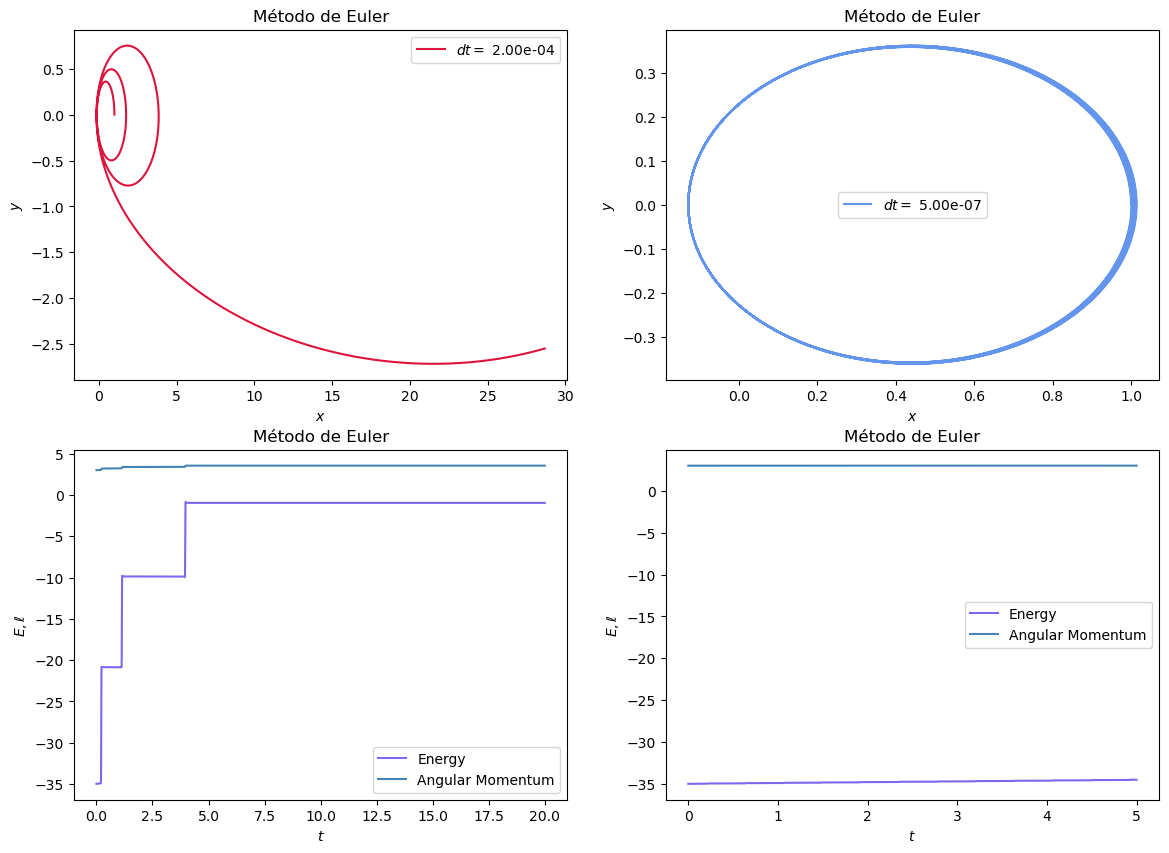

In [8]:
EnergyE = np.zeros(n)
AngMomE = np.zeros(n)

EnergyEII = np.zeros(nII)
AngMomEII = np.zeros(nII)

for i in range(n):
    speed2 = QE[i,2]**2 + QE[i,3]**2
    r = np.sqrt(QE[i,0]**2 + QE[i,1]**2)
    EnergyE[i] = speed2/2 - G*M/r
    AngMomE[i] = QE[i,0]*QE[i,3] - QE[i,1]*QE[i,2]

for i in range(nII):
    speed2 = QEII[i,2]**2 + QEII[i,3]**2
    r = np.sqrt(QEII[i,0]**2 + QEII[i,1]**2)
    EnergyEII[i] = speed2/2 - G*M/r
    AngMomEII[i] = QEII[i,0]*QEII[i,3] - QEII[i,1]*QEII[i,2]


fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0,0].plot(QE[:,0], QE[:,1], color='crimson', label=f'$dt=$ {dt:.2e}')
ax[0,0].set_title('Método de Euler')
ax[0,0].set_xlabel(r'$x$')
ax[0,0].set_ylabel(r'$y$')
ax[0,0].legend()

ax[0,1].plot(QEII[:,0], QEII[:,1], color='cornflowerblue', label=f'$dt=$ {dtII:.2e}')
ax[0,1].set_title('Método de Euler')
ax[0,1].set_xlabel(r'$x$')
ax[0,1].set_ylabel(r'$y$')
ax[0,1].legend()

ax[1,0].plot(t, EnergyE, color='mediumslateblue', label=f'Energy')
ax[1,0].plot(t, AngMomE, color='steelblue', label=f'Angular Momentum')
ax[1,0].set_title('Método de Euler')
ax[1,0].set_xlabel(r'$t$')
ax[1,0].set_ylabel(r'$E, \ell$')
ax[1,0].legend()

ax[1,1].plot(tII, EnergyEII, color='mediumslateblue', label=f'Energy')
ax[1,1].plot(tII, AngMomEII, color='steelblue', label=f'Angular Momentum')
ax[1,1].set_title('Método de Euler')
ax[1,1].set_xlabel(r'$t$')
ax[1,1].set_ylabel(r'$E, \ell$')
ax[1,1].legend()

plt.show()

These plots show clearly that the forward Euler's method with a not-so-small setpsize does not satisfy the conservation of energy (and produces a small increase in the angular momentum), while the RK4 do have a very good behavior.

In [9]:
print(f'El cambio en la energía utilizandoun paso de dt = {dt:.2e} :', np.abs(EnergyE[n-1] - EnergyE[0]))
print(f'\nEl cambio en la energía utilizandoun paso de dt = {dtII:.2e} :', np.abs(EnergyEII[n-1] - EnergyEII[0]))

El cambio en la energía utilizandoun paso de dt = 2.00e-04 : 34.01224429334252

El cambio en la energía utilizandoun paso de dt = 5.00e-07 : 2.4442463711693563e-05
